In [1]:
pip install pillow

In [2]:
pip install Canvas


  Created wheel for Canvas: filename=canvas-0.2-py3-none-any.whl size=3402 sha256=137284d21f95ee3d99c8d8438bbd33a381a36246c9f152a606181e401e255c2f
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\70\2b\a5\55630a1509673ce00a01c6dc0cffb4be14cdd0407fdf935446
Successfully built Canvas


In [1]:
pip install keras-facenet
pip install -U scikit-learn scipy matplotlib
pip install scikit-metrics
pip install pandas

In [1]:
print("hello")

hello


In [1]:
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray
from mtcnn.mtcnn import MTCNN
import time
import os
import numpy as np
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from pathlib import Path

import neha

Using TensorFlow backend.


In [2]:
persons_dataset_path ="C:/Users/admin/Desktop/Amu/BE MAJOR PROJECT/Code/Lost children/children/minidataset"
images, labels=neha.load_rgb_data(persons_dataset_path,200,shuffle=True)

Loading images...
['Amisha Pupala', 'arnav', 'Avneet Kaur', 'Chakuli', 'Gaurangi', 'Megh', 'Mokshada', 'Om', 'Pari', 'Piyush', 'Pratiksha', 'Rutuja', 'Sakshi', 'Siddhesh', 'Smit', 'Soham', 'Sushmita', 'Swarali', 'Yog']
Loading Amisha Pupala
we will load [ 6 ] files from [ Amisha Pupala ] class ...
Loading arnav
we will load [ 4 ] files from [ arnav ] class ...
Loading Avneet Kaur
we will load [ 1 ] files from [ Avneet Kaur ] class ...
Loading Chakuli
we will load [ 4 ] files from [ Chakuli ] class ...
Loading Gaurangi
we will load [ 5 ] files from [ Gaurangi ] class ...
Loading Megh
we will load [ 3 ] files from [ Megh ] class ...
Loading Mokshada
we will load [ 4 ] files from [ Mokshada ] class ...
Loading Om
we will load [ 4 ] files from [ Om ] class ...
Loading Pari
we will load [ 5 ] files from [ Pari ] class ...
Loading Piyush
we will load [ 5 ] files from [ Piyush ] class ...
Loading Pratiksha
we will load [ 4 ] files from [ Pratiksha ] class ...
Loading Rutuja
we will load [ 5 ]

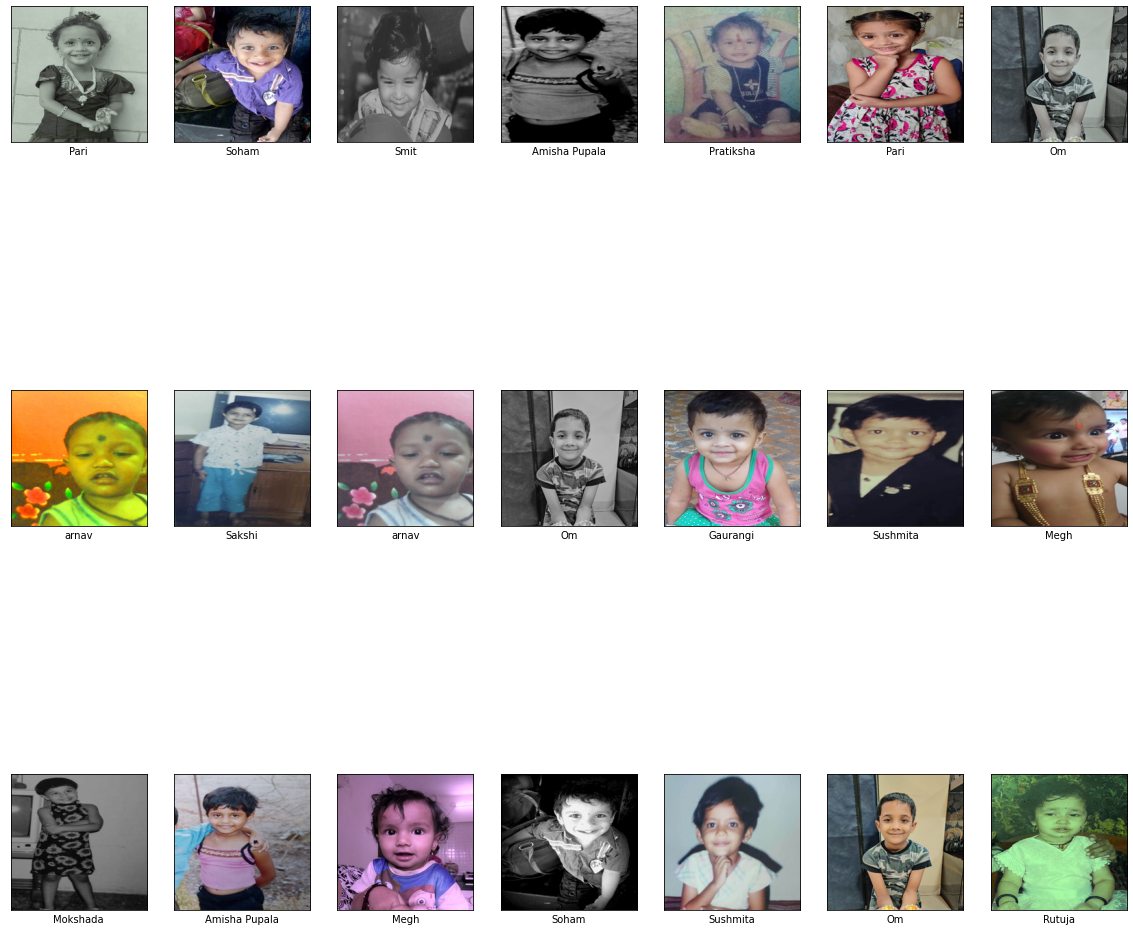

In [3]:
neha.plot_sample_from_dataset(images,labels,rows=3,colums=7,width=20,height=20)


In [4]:
def extract_face(path_to_filename, detector, required_size=(160,160), save_faces=True):
    image=Image.open(path_to_filename)
    image=image.convert('RGB')
    pixels=asarray(image)
    results=detector.detect_faces(pixels)
    x1,y1,width,height=results[0]['box']
    x1,y1 = abs(x1),abs(y1)
    x2,y2 = x1 + width, y1 + height
    face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    image = image.resize(required_size)
    if(save_faces):
        path = os.path.split(os.path.abspath(path_to_filename))[0]
        file_name = os.path.split(os.path.abspath(path_to_filename))[1]
        person_name = os.path.basename(os.path.normpath(Path(path)))
        project_folder = Path(path).parent.parent
        print(person_name)
        target_folder = os.path.join(project_folder, 'children_duplicate' ,person_name)
        if not os.path.exists(target_folder):
            os.makedirs(target_folder)
        target_face_file_path = os.path.join(target_folder, file_name)
        print(target_face_file_path)
        image.save(target_face_file_path)
    face_array = asarray(image)
    return face_array

In [5]:
def extract_faces(directory):
    print('load faces')
    faces = list()
    
    detector=MTCNN()
    print('Extracting faces from ', directory, '...')
    for filename in listdir(directory):
        path = directory + filename 
        try:
             face = extract_face(path, detector, save_faces=True)
        except Exception as e:
            continue
        faces.append(face)
    return faces

In [6]:
def generate_faces_from_images(directory):
    print('Load dataset ...')
    X,y = list(),list()
    num = 1 
    for subdir in listdir(directory):
        path = directory +  '/' + subdir + '/' 
        if not isdir(path):
            continue
        faces = extract_faces(path)
        labels = [subdir for _ in range(len(faces))]
        print('> %d) loaded %d examples for class : %s' %  (num , len(faces), subdir))
        num =num + 1
        X.extend(faces)
        y.extend(labels)
    return asarray(X), asarray(y)
     

In [7]:
faces, labels = generate_faces_from_images(persons_dataset_path)
print(faces.shape, labels.shape)

Load dataset ...
load faces
Extracting faces from  C:/Users/admin/Desktop/Amu/BE MAJOR PROJECT/Code/Lost children/children/minidataset/Amisha Pupala/ ...
Amisha Pupala
C:\Users\admin\Desktop\Amu\BE MAJOR PROJECT\Code\Lost children\children\children_duplicate\Amisha Pupala\Amisha2.jpg
Amisha Pupala
C:\Users\admin\Desktop\Amu\BE MAJOR PROJECT\Code\Lost children\children\children_duplicate\Amisha Pupala\ammu.jpg
Amisha Pupala
C:\Users\admin\Desktop\Amu\BE MAJOR PROJECT\Code\Lost children\children\children_duplicate\Amisha Pupala\ammu1.jpeg
Amisha Pupala
C:\Users\admin\Desktop\Amu\BE MAJOR PROJECT\Code\Lost children\children\children_duplicate\Amisha Pupala\amutest.jpeg
Amisha Pupala
C:\Users\admin\Desktop\Amu\BE MAJOR PROJECT\Code\Lost children\children\children_duplicate\Amisha Pupala\Amuu.jpeg
Amisha Pupala
C:\Users\admin\Desktop\Amu\BE MAJOR PROJECT\Code\Lost children\children\children_duplicate\Amisha Pupala\amy.jpg
> 1) loaded 6 examples for class : Amisha Pupala
load faces
Extractin

Sakshi
C:\Users\admin\Desktop\Amu\BE MAJOR PROJECT\Code\Lost children\children\children_duplicate\Sakshi\sakshu1.jpeg
> 13) loaded 4 examples for class : Sakshi
load faces
Extracting faces from  C:/Users/admin/Desktop/Amu/BE MAJOR PROJECT/Code/Lost children/children/minidataset/Siddhesh/ ...
Siddhesh
C:\Users\admin\Desktop\Amu\BE MAJOR PROJECT\Code\Lost children\children\children_duplicate\Siddhesh\Siddhesh.jpeg
Siddhesh
C:\Users\admin\Desktop\Amu\BE MAJOR PROJECT\Code\Lost children\children\children_duplicate\Siddhesh\Siddhesh1.jpeg
Siddhesh
C:\Users\admin\Desktop\Amu\BE MAJOR PROJECT\Code\Lost children\children\children_duplicate\Siddhesh\siddhu.jpeg
Siddhesh
C:\Users\admin\Desktop\Amu\BE MAJOR PROJECT\Code\Lost children\children\children_duplicate\Siddhesh\siddhu2.jpeg
> 14) loaded 4 examples for class : Siddhesh
load faces
Extracting faces from  C:/Users/admin/Desktop/Amu/BE MAJOR PROJECT/Code/Lost children/children/minidataset/Smit/ ...
Smit
C:\Users\admin\Desktop\Amu\BE MAJOR PRO

In [8]:
savez_compressed("face_dataset_numpy.npz" , faces, labels)

In [9]:
faces_dataset_path="C:/Users/admin/Desktop/Amu/BE MAJOR PROJECT/Code/Lost children/children/children_duplicate"
images, labels=neha.load_rgb_data(faces_dataset_path,200,shuffle=True)

Loading images...
['abc', 'Amisha', 'Amisha Pupala', 'amutest', 'arnav', 'Avneet Kaur', 'Chakuli', 'Gaurangi', 'Megh', 'Mokshada', 'Om', 'Pari', 'Piyush', 'Pratiksha', 'Rutuja', 'Sakshi', 'Siddhesh', 'Smit', 'Soham', 'Sushmita', 'Swarali', 'test', 'test33', 'Yog']
Loading abc
we will load [ 1 ] files from [ abc ] class ...
Loading Amisha
we will load [ 7 ] files from [ Amisha ] class ...
Loading Amisha Pupala
we will load [ 6 ] files from [ Amisha Pupala ] class ...
Loading amutest
we will load [ 1 ] files from [ amutest ] class ...
Loading arnav
we will load [ 4 ] files from [ arnav ] class ...
Loading Avneet Kaur
we will load [ 1 ] files from [ Avneet Kaur ] class ...
Loading Chakuli
we will load [ 4 ] files from [ Chakuli ] class ...
Loading Gaurangi
we will load [ 3 ] files from [ Gaurangi ] class ...
Loading Megh
we will load [ 3 ] files from [ Megh ] class ...
Loading Mokshada
we will load [ 4 ] files from [ Mokshada ] class ...
Loading Om
we will load [ 4 ] files from [ Om ] cla

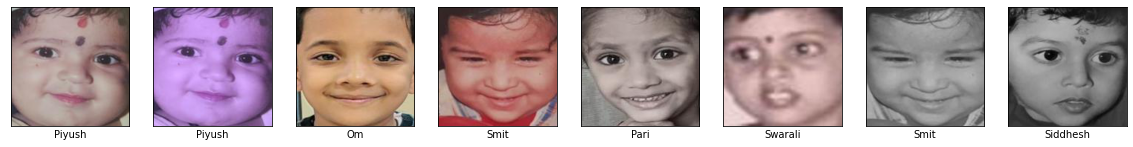

In [10]:
neha.plot_sample_from_dataset(images,labels,rows=1,colums=8,width=20,height=20)

In [11]:
faces_dataset_numpy= "face_dataset_numpy.npz"
from numpy import load
data = load(faces_dataset_numpy)
faces, labels2 = data['arr_0'], data['arr_1']

Label = Siddhesh
image shape:  (200, 200, 3)


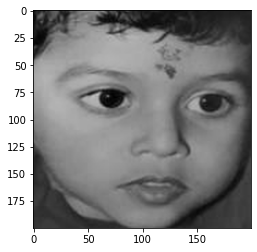

In [12]:
import matplotlib.pyplot as plt

neha.display_image(images, labels, index=7)

In [13]:
#generate embedding from faces
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
import tensorflow as tf

In [14]:
def get_embedding(model, face_pixels):
    face_pixels = face_pixels.astype('float32')
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    samples = expand_dims(face_pixels, axis=0)
    yhat = model.predict(samples)    
    return yhat[0]

In [15]:
faces_dataset_path= "face_dataset_numpy.npz"
data = load(faces_dataset_path)
faces, labels = data['arr_0'], data['arr_1']
print('Loaded: ', faces.shape, labels.shape)

Loaded:  (76, 160, 160, 3) (76,)


In [16]:
model=tf.keras.models.load_model('facenet_keras.h5')
print('Loaded Model')

Loaded Model


In [17]:
face_embeddings = list()
for face_pixels in faces:
    embedding=get_embedding(model, face_pixels)
    face_embeddings.append(embedding)
face_embeddings = asarray(face_embeddings)
print(face_embeddings.shape)

(76, 128)


In [18]:
savez_compressed('face_embeddings.npz', face_embeddings, labels)

In [19]:
#FACE RECOGNITION
import tensorflow as tf
from numpy import asarray
from numpy import load
import time
from detect_face_from_one_image import extract_face
from image_embeddings import get_embedding
from mtcnn.mtcnn import MTCNN
import re
from os import listdir
import os
import neha
import csv



%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from AgeProgressionFunctions import *

In [20]:
tick = time.time()
model = tf.keras.models.load_model('facenet_keras.h5')
print('Time to load facenet model and dataset : ', time.time()-tick, "sec")
print('********* Loaded Model **********')

Time to load facenet model and dataset :  15.782378196716309 sec
********* Loaded Model **********


In [21]:
import numpy
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from numpy import load
from sklearn.metrics import classification_report

def classification(faces_embedding, labels):
    faces_embedding = normalization2(faces_embedding)
    labels = lablization(labels)
    
    classifier = KNeighborsClassifier(n_neighbors=8, p=1, weights="distance", metric="euclidean")
    classifier.fit(faces_embedding, labels)
    
    return classifier


def normalization(faces_embedding, face_to_predict_embedding):
    in_encoder = Normalizer(norm='l2')
    faces_embedding = in_encoder.transform(faces_embedding)
    face_to_predict_embedding = in_encoder.transform(face_to_predict_embedding)
    
    return faces_embedding, face_to_predict_embedding

def normalization2(faces_embedding):
    in_encoder = Normalizer(norm='l2')
    faces_embedding = in_encoder.transform(faces_embedding)
    
    return faces_embedding

def lablization(labels) :
    
    out_encoder = LabelEncoder()
    
    out_encoder.fit(labels)
    
    labels = out_encoder.transform(labels)
    
    return labels

def predict2(face_to_predict_embedding, faces_embedding, labels, classifier) :
    out_encoder = LabelEncoder()
    out_encoder.fit(labels)
       
    labels = out_encoder.transform(labels)
    
    faces_embedding, face_to_predict_embedding = normalization(faces_embedding, face_to_predict_embedding)
    
    face_emb = face_to_predict_embedding[0]
    
    #prediction for the faces
    samples = expand_dims(face_emb, axis=0)
    yhat_class = classifier.predict(samples)
    print(yhat_class)
    yhat_prob = classifier.predict_proba(samples)
    print(yhat_class)
    
    class_index = yhat_class[0]
    class_probability = yhat_prob[0,class_index] * 100
    
    predict_names = out_encoder.inverse_transform(yhat_class)[0]
    
    return predict_names, class_probability



In [22]:
#AGE PROGRESSION
import time

def AgeProgress(imgname):
    ageProgressedImg=mpimg.imread('../Aging/Age Progressed/'+imgname)
    return ageProgressedImg
    

In [23]:
#load dataset
faces_embeddings_path = 'face_embeddings.npz'
data = load(faces_embeddings_path)
faces_embedding, labels = data['arr_0'], data['arr_1']

detector = MTCNN()
tick = time.time()
classifier = classification(faces_embedding, labels)
print("classifier time: ", time.time()-tick)
print("************* Loaded Embeddings **************")

classifier time:  0.656928539276123
************* Loaded Embeddings **************


Label = ../children/FACEREC/recognization/Amutest.jpeg
image shape:  (160, 160, 3)
Time to extract image :  10.194236278533936


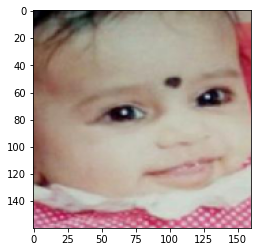

In [24]:
#extract faces from image
tick = time.time()
#image_to_predict = "C:/Users/admin/Desktop/Amu/BE MAJOR PROJECT/Code/Lost children/children/FACEREC/recognization/Amuu.jpeg"

image_to_predict = "../children/FACEREC/recognization/Amutest.jpeg"
image = extract_face(detector, image_to_predict)

neha.display_one_image(image, image_to_predict)
print('Time to extract image : ',time.time()-tick)



In [25]:
#get embedding of face
face_to_predict_embedding = get_embedding(model, image)

In [26]:
face_expected_name = re.findall("facenet/(\w+).jpg", image_to_predict)
print(face_expected_name)


[]


In [27]:
#predict2
tick = time.time()

predict_name, class_probability = predict2(face_to_predict_embedding, faces_embedding, labels, classifier)

flag=0

if(class_probability >= 27) :
    print('Predicted : %s (%.3f)' % (predict_name,class_probability))
    unknown_name= ' '
    flag=1
    
else :
    #Age progression and face recognition
   
    image = extract_face(detector, image_to_predict)
    neha.display_one_image(image, image_to_predict)
    face_to_predict_embedding = get_embedding(model, image)
    ageProgressedImg=AgeProgress(image_to_predict)
    
    predict_name, class_probability = predict2(face_to_predict_embedding, faces_embedding, labels, classifier)
    flag=1

    if(class_probability >= 27) :
        print('Predicted : %s (%.3f)' % (predict_name,class_probability))
    
if(flag==0):
    unknown_name = "Unknown"
    print('Predicted : %s (%.3f)'  % (unknown_name, class_probability))
    print('Closed Prediction : ',predict_name)

face_expected_name = re.findall("facenet/(\w+).jpg", image_to_predict)
print(face_expected_name)

print("Total time to Predict: ",time.time()-tick)

[0]
[0]
Predicted : Amisha Pupala (100.000)
[]
Total time to Predict:  0.1457524299621582


In [28]:
    
    
def Search():
    from os import listdir
    from os.path import isdir
    from PIL import Image
    from matplotlib import pyplot
    from numpy import savez_compressed
    from numpy import asarray
    from mtcnn.mtcnn import MTCNN
    import time
    import os
    import numpy as np
    os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
    from pathlib import Path

    import neha




    persons_dataset_path ="../children/minidataset"
    images, labels=neha.load_rgb_data(persons_dataset_path,200,shuffle=True)


    neha.plot_sample_from_dataset(images,labels,rows=3,colums=7,width=20,height=20)



    def extract_face(path_to_filename, detector, required_size=(160,160), save_faces=True):
        image=Image.open(path_to_filename)
        image=image.convert('RGB')
        pixels=asarray(image)
        results=detector.detect_faces(pixels)
        x1,y1,width,height=results[0]['box']
        x1,y1 = abs(x1),abs(y1)
        x2,y2 = x1 + width, y1 + height
        face = pixels[y1:y2, x1:x2]
        image = Image.fromarray(face)
        image = image.resize(required_size)
        if(save_faces):
            path = os.path.split(os.path.abspath(path_to_filename))[0]
            file_name = os.path.split(os.path.abspath(path_to_filename))[1]
            person_name = os.path.basename(os.path.normpath(Path(path)))
            project_folder = Path(path).parent.parent
            print(person_name)
            target_folder = os.path.join(project_folder, 'children_duplicate' ,person_name)
            if not os.path.exists(target_folder):
                os.makedirs(target_folder)
            target_face_file_path = os.path.join(target_folder, file_name)
            print(target_face_file_path)
            image.save(target_face_file_path)
        face_array = asarray(image)
        return face_array




    def extract_faces(directory):
        print('load faces')
        faces = list()

        detector=MTCNN()
        print('Extracting faces from ', directory, '...')
        for filename in listdir(directory):
            path = directory + filename 
            try:
                 face = extract_face(path, detector, save_faces=True)
            except Exception as e:
                continue
            faces.append(face)
        return faces




    def generate_faces_from_images(directory):
        print('Load dataset ...')
        X,y = list(),list()
        num = 1 
        for subdir in listdir(directory):
            path = directory +  '/' + subdir + '/' 
            if not isdir(path):
                continue
            faces = extract_faces(path)
            labels = [subdir for _ in range(len(faces))]
            print('> %d) loaded %d examples for class : %s' %  (num , len(faces), subdir))
            num =num + 1
            X.extend(faces)
            y.extend(labels)
        return asarray(X), asarray(y)





    faces, labels = generate_faces_from_images(persons_dataset_path)
    print(faces.shape, labels.shape)




    savez_compressed("face_dataset_numpy.npz" , faces, labels)





    faces_dataset_path="../children/children_duplicate"
    images, labels=neha.load_rgb_data(faces_dataset_path,200,shuffle=True)





    neha.plot_sample_from_dataset(images,labels,rows=1,colums=8,width=20,height=20)




    faces_dataset_numpy= "face_dataset_numpy.npz"
    from numpy import load
    data = load(faces_dataset_numpy)
    faces, labels2 = data['arr_0'], data['arr_1']




    import matplotlib.pyplot as plt

    neha.display_image(images, labels, index=7)




    #generate embedding from faces
    from numpy import load
    from numpy import expand_dims
    from numpy import asarray
    from numpy import savez_compressed
    import tensorflow as tf




    def get_embedding(model, face_pixels):
        face_pixels = face_pixels.astype('float32')
        mean, std = face_pixels.mean(), face_pixels.std()
        face_pixels = (face_pixels - mean) / std
        samples = expand_dims(face_pixels, axis=0)
        yhat = model.predict(samples)    
        return yhat[0]





    faces_dataset_path= "face_dataset_numpy.npz"
    data = load(faces_dataset_path)
    faces, labels = data['arr_0'], data['arr_1']
    print('Loaded: ', faces.shape, labels.shape)




    model=tf.keras.models.load_model('facenet_keras.h5')
    print('Loaded Model')




    face_embeddings = list()
    for face_pixels in faces:
        embedding=get_embedding(model, face_pixels)
        face_embeddings.append(embedding)
    face_embeddings = asarray(face_embeddings)
    print(face_embeddings.shape)





    savez_compressed('face_embeddings.npz', face_embeddings, labels)



    #FACE RECOGNITION
    import tensorflow as tf
    from numpy import asarray 
    from numpy import load
    import time
    from detect_face_from_one_image import extract_face
    from image_embeddings import get_embedding
    from mtcnn.mtcnn import MTCNN
    import re
    from os import listdir
    import os
    import neha
    import csv




    tick = time.time()
    model = tf.keras.models.load_model('facenet_keras.h5')
    print('Time to load facenet model and dataset : ', time.time()-tick, "sec")
    print('********* Loaded Model **********')





    import numpy
    from numpy import expand_dims
    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import Normalizer
    from sklearn.svm import SVC
    from matplotlib import pyplot
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.neural_network import MLPClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_curve
    from numpy import load
    from sklearn.metrics import classification_report

    def classification(faces_embedding, labels):
        faces_embedding = normalization2(faces_embedding)
        labels = lablization(labels)

        classifier = KNeighborsClassifier(n_neighbors=8, p=1, weights="distance", metric="euclidean")
        classifier.fit(faces_embedding, labels)

        return classifier


    def normalization(faces_embedding, face_to_predict_embedding):
        in_encoder = Normalizer(norm='l2')
        faces_embedding = in_encoder.transform(faces_embedding)
        face_to_predict_embedding = in_encoder.transform(face_to_predict_embedding)

        return faces_embedding, face_to_predict_embedding

    def normalization2(faces_embedding):
        in_encoder = Normalizer(norm='l2')
        faces_embedding = in_encoder.transform(faces_embedding)

        return faces_embedding

    def lablization(labels) :

        out_encoder = LabelEncoder()

        out_encoder.fit(labels)

        labels = out_encoder.transform(labels)

        return labels

    def predict2(face_to_predict_embedding, faces_embedding, labels, classifier) :
        out_encoder = LabelEncoder()
        out_encoder.fit(labels)

        labels = out_encoder.transform(labels)

        faces_embedding, face_to_predict_embedding = normalization(faces_embedding, face_to_predict_embedding)

        face_emb = face_to_predict_embedding[0]

        #prediction for the faces
        samples = expand_dims(face_emb, axis=0)
        yhat_class = classifier.predict(samples)
        print(yhat_class)
        yhat_prob = classifier.predict_proba(samples)
        print(yhat_class)

        class_index = yhat_class[0]
        class_probability = yhat_prob[0,class_index] * 100

        predict_names = out_encoder.inverse_transform(yhat_class)[0]

        return predict_names, class_probability






    #load dataset
    faces_embeddings_path = 'face_embeddings.npz'
    data = load(faces_embeddings_path)
    faces_embedding, labels = data['arr_0'], data['arr_1']

    detector = MTCNN()
    tick = time.time()
    classifier = classification(faces_embedding, labels)
    print("classifier time: ", time.time()-tick)
    print("************* Loaded Embeddings **************")






    #extract faces from image
    tick = time.time()
    image_to_predict = img1dest+"/"+fn
    image = extract_face(detector, image_to_predict)

    neha.display_one_image(image, image_to_predict)
    print('Time to extract image : ',time.time()-tick)




    #get embedding of face
    face_to_predict_embedding = get_embedding(model, image)



    face_expected_name = re.findall("facenet/(\w+).jpg", image_to_predict)
    print(face_expected_name)

    global predict_name


    #predict2
    tick = time.time()

    predict_name, class_probability = predict2(face_to_predict_embedding, faces_embedding, labels, classifier)

    unknown_name = "unknown"

    if(class_probability >= 27) :
        print('Predicted : %s (%.3f)' % (predict_name,class_probability))
        unknown_name= ' '

    else :
        unknown_name = "Unknown"
        print('Predicted : %s (%.3f)'  % (unknown_name, class_probability))
        print('Closed Prediction : ',predict_name)

    face_expected_name = re.findall("facenet/(\w+).jpg", image_to_predict)
    print(face_expected_name)

    print("Total time to Predict: ",time.time()-tick)

In [32]:
import tkinter as tk
from tkinter import *
import shutil, os
from PIL import ImageTk,Image  
from tkinter import filedialog
import csv
import sys

windowmain = tk.Tk()
windowmain.geometry("1800x810")
framemain=Frame(windowmain)
framemain.pack()

bg =PhotoImage(file="../Back1.png")

can=Canvas(windowmain, width=1800,height=810)
can.pack(fill="both",expand=True)
can.create_image(0,0,image=bg,anchor="nw")

can.create_text(670,55,text="Welcome to MISSING CHILD FINDING PORTAL!",font="Times  38 bold",fill="White")


b1=Button(windowmain, text ="         Upload Child Details          ",font=' Helvetica 25 bold',bg="#3c3a57",fg="White",command=lambda:UploadDetails())
b2=Button(windowmain, text ="    Search for a Missing Child     ",font=' Helvetica 25 bold',bg="#3c3a57",fg="White", command=lambda:SearchChild())
b1_window=can.create_window(200,300,anchor="nw", window=b1)
b2_window=can.create_window(200,400,anchor="nw", window=b2)

def resize_image(event):
    new_width = event.width
    new_height = event.height
    image = copy_of_image.resize((new_width, new_height))
    photo = ImageTk.PhotoImage(image)
    label.config(image = photo)
    label.image = photo #avoid garbage collection

image = Image.open('../Back1.png')
copy_of_image = image.copy()
photo = ImageTk.PhotoImage(image)
label = tk.Label(windowmain, image = photo)
label.bind('<Configure>', resize_image)
label.pack(fill="both", expand = True)

def clicked():
    global filename,fn,img1dest
    filename = filedialog.askopenfile(filetypes = (("jpeg files","*.jpg"),("all files","*.*")))
    filename=str(filename)
    fn1=filename.split("/")
    fn=fn1[10].split(" ")
    fn=fn[0]
    fn=fn[0:len(fn)-1]
    print(fn)
    
    img1src='test/'+fn
    img1dest='../children/FACEREC/recognization'

    shutil.copy(img1src,img1dest)


    img1 = Image.open(img1src)
    img1 = img1.resize((300, 350), Image.ANTIALIAS) 
    render = ImageTk.PhotoImage(img1)
    img = Label(image=render, borderwidth=0)
    img.image = render
    img.place(x=900, y=250)
    

def SearchChild():
    windowmain.destroy()
    global window2
    window2 = tk.Tk()
    window2.geometry("1800x810")
    frame1=Frame(window2)
    frame1.pack()
    
    bg=PhotoImage(file="../Back1.png")
    
    can=Canvas(window2, width=1800,height=810)
    can.pack(fill="both",expand=True)
    can.create_image(0,0,image=bg,anchor="nw")
    
    def resize_image(event):
        new_width = event.width
        new_height = event.height
        image = copy_of_image.resize((new_width, new_height))
        photo = ImageTk.PhotoImage(image)
        label.config(image = photo)
        label.image = photo #avoid garbage collection

    image = Image.open('../Back1.png')
    copy_of_image = image.copy()
    photo = ImageTk.PhotoImage(image)
    label = tk.Label(window2, image = photo)
    label.bind('<Configure>', resize_image)
    label.pack(fill="both", expand = True)
    
    can.create_text(500,220,text="Please upload photo of the Child to be\nsearched in the database",font='Times 38 bold', fill="White")
    can.create_text(350,360,text="Upload image file(.jpeg/.jpg/.png)     : ",font='Helvetica 20 bold', fill="White")
    
    l=PhotoImage(file="C:/Users/admin/Desktop/Amu/BE MAJOR PROJECT/Code/Lost children/ul.png")
    open_file_button = Button(window2, image=l, command=clicked, padx=5, pady=5,bg="#3c3a57")
    open_file_button.place(x=640,y=342)
    s=PhotoImage(file="C:/Users/admin/Desktop/Amu/BE MAJOR PROJECT/Code/Lost children/sea.png")
    b2=Button(window2, text="Search",image=s,font='Helvetica 18 bold',bg="#3c3a57",fg="#a6f1f5",command=lambda:SearchResult())
    b2.place(x=100, y=450)
    window2.mainloop()
    #LoadingPage
    
    




def LoadingPage():
    global windowlp
    windowlp = tk.Tk()
    windowlp.geometry("900x600")
    framesr=Frame(windowlp)
    framesr.pack() 
    l1=Label(windowlp, text="Searching in the database.\n Please wait!",font='Arial 16 bold italic underline', fg="#0f1c13")
    l1.place(x=100, y=20)

def SearchResult():
   
    window2.destroy()
    
    global windowlp
    windowlp = tk.Tk()
    windowlp.geometry("1880x810")
    framesr=Frame(windowlp)
    framesr.pack()
    
    bg=PhotoImage(file="../Back1.png")
    
    can=Canvas(windowlp, width=1880,height=810)
    can.pack(fill="both",expand=True)
    can.create_image(0,0,image=bg,anchor="nw")
    
    def resize_image(event):
        new_width = event.width
        new_height = event.height
        image = copy_of_image.resize((new_width, new_height))
        photo = ImageTk.PhotoImage(image)
        label.config(image = photo)
        label.image = photo #avoid garbage collection

    #global windowlp
    image = Image.open('../Back1.png')
    copy_of_image = image.copy()
    photo = ImageTk.PhotoImage(image)
    label = tk.Label(windowlp, image = photo)
    label.bind('<Configure>', resize_image)
    label.pack(fill="both", expand = True)
    can.create_text(500,220,text="Searching in the database.\nPlease wait!",font='Times 38 bold', fill="White")
    #windowlp.destroy()
    print("LOADING PAGE")
    windowlp.mainloop()
    
    #Search()
    print("Search")
    
    print("Loading window destroyed")
    windowsr = tk.Tk()
    windowsr.geometry("1800x810")
    framesr=Frame(windowsr)
    framesr.pack()
    bg=PhotoImage(file="../Back1.png")
    
    can=Canvas(windowsr, width=1800,height=810)
    can.pack(fill="both",expand=True)
    can.create_image(0,0,image=bg,anchor="nw")
    def resize_image(event):
        new_width = event.width
        new_height = event.height
        image = copy_of_image.resize((new_width, new_height))
        photo = ImageTk.PhotoImage(image)
        label.config(image = photo)
        label.image = photo #avoid garbage collection
    
    image = Image.open('../Back1.png')
    copy_of_image = image.copy()
    photo = ImageTk.PhotoImage(image)
    label = tk.Label(windowsr, image = photo)
    label.bind('<Configure>', resize_image)
    label.pack(fill="both", expand = True)
    can.create_text(650,70,text="Following child is found in the database",font='Times  38 bold', fill="White")
    
    predict_name='Avneet'
    
    csv_file = csv.reader(open('childdetails.csv', "r"), delimiter=",")

    for row in csv_file:
        if(len(row)==0):
            pass
        else:
            if predict_name == row[0][0:len(row[0])-1]:
                row1=row
                print (row[0][0:len(row[0])-1])
                print("hello")
                break
    
    can.create_text(350,180,text="Name= " +row1[0][0:len(row1[0])-1],font='Helvetica 20 bold', fill="White")
    
    can.create_text(350,230,text="Age= "+row1[1][0:len(row1[1])-1],font='Helvetica 20 bold', fill="White")
    
    can.create_text(350,300,text="Date and Time= "+row1[2][0:len(row1[2])-1],font='Helvetica 20 bold', fill="White")
   
    can.create_text(350,375,text="Address= "+row1[3][0:len(row1[3])-1],font='Helvetica 20 bold', fill="White")
    
    can.create_text(350,455,text="Details of cloths= "+row1[4][0:len(row1[4])-1],font='Helvetica 20 bold', fill="White")
    
    can.create_text(360,520,text="Comments= "+row1[5][0:len(row1[5])-1],font='Helvetica 20 bold', fill="White")
    
    import glob
    foundpath='../children/minidataset/'+row1[0][0:len(row1[0])-1]+'/*.jp*'
    imgfound=glob.glob(foundpath)
    print(imgfound)
    
    img2 = Image.open(imgfound[0])
    img2 = img2.resize((350, 400), Image.ANTIALIAS) 
    render3 = ImageTk.PhotoImage(img2)
    img2 = Label(image=render3, borderwidth=10)
    img2.image = render3
    img2.place(x=820, y=150)
    windowsr.mainloop()
    
#Upload details button clicked    
def clickedud():

    #print("e2=",e2)
    global filename2,fn2,fnud
    filename2 = filedialog.askopenfile(filetypes = (("jpeg files","*.jpg"),("all files","*.*")))
    filename2=str(filename2)
    fn2=filename2.split("/")
    fnud=fn2[10].split(" ")
    fnud=fnud[0]
    fnud=fnud[0:len(fnud)-1]
    print(fnud)
    
    global img2src, img3dest
    img2src='test/'+fnud
    


    img2 = Image.open(img2src)
    img2 = img2.resize((350, 400), Image.ANTIALIAS) 
    render2 = ImageTk.PhotoImage(img2)
    img2 = Label(image=render2, borderwidth=10)
    img2.image = render2
    img2.place(x=950, y=100)
    
  
    

    
    
def SaveToDB():
    global img2dest
    ee2=e2.get("1.0",END)
    ee3=e3.get("1.0",END)
    ee4=e4.get("1.0",END)
    ee5=e5.get("1.0",END)
    ee6=e6.get("1.0",END)
    ee7=e7.get("1.0",END)
   
    
                
    with open('childdetails.csv','a') as out:
        csvWriter = csv.writer(out)
        row = (ee2,ee3,ee4,ee5,ee6,ee7)
        csvWriter.writerow(row)
        
    img2dest = os.path.join('../children/minidataset/', ee2) 
    if not os.path.exists(img2dest[0:len(img2dest)-1]):
        os.makedirs(img2dest[0:len(img2dest)-1])

    print("img2 dest=", img2dest)
    shutil.copy(img2src,img2dest[0:len(img2dest)-1])
    windowud.destroy()
    
    #Display main window again
    
    global windowmain

    windowmain = tk.Tk()
    windowmain.geometry("1800x810")
    framemain=Frame(windowmain)
    framemain.pack()

    bg =PhotoImage(file="../Back1.png")

    can=Canvas(windowmain, width=1800,height=810)
    can.pack(fill="both",expand=True)
    can.create_image(0,0,image=bg,anchor="nw")

    can.create_text(670,55,text="Welcome to MISSING CHILD FINDING PORTAL!",font="Times  38 bold",fill="White")


    b1=Button(windowmain, text ="         Upload Child Details          ",font=' Helvetica 25 bold',bg="#3c3a57",fg="White",command=lambda:UploadDetails())
    b2=Button(windowmain, text ="    Search for a Missing Child     ",font=' Helvetica 25 bold',bg="#3c3a57",fg="White", command=lambda:SearchChild())
    b1_window=can.create_window(200,300,anchor="nw", window=b1)
    b2_window=can.create_window(200,400,anchor="nw", window=b2)

    def resize_image(event):
        new_width = event.width
        new_height = event.height
        image = copy_of_image.resize((new_width, new_height))
        photo = ImageTk.PhotoImage(image)
        label.config(image = photo)
        label.image = photo #avoid garbage collection

    image = Image.open('../Back1.png')
    copy_of_image = image.copy()
    photo = ImageTk.PhotoImage(image)
    label = tk.Label(windowmain, image = photo)
    label.bind('<Configure>', resize_image)
    label.pack(fill="both", expand = True)
    windowmain.mainloop()
        
def UploadDetails():
    global windowud
    windowmain.destroy()
    windowud = tk.Tk()
    windowud.geometry("1800x810")
    frameud=Frame(windowud)
    frameud.pack()
    
    bg=PhotoImage(file="../Back1.png")
    
    can=Canvas(windowud, width=1800,height=810)
    can.pack(fill="both",expand=True)
    can.create_image(0,0,image=bg,anchor="nw")
    
    global e2,e3,e4,e5,e6,e7
    
    can.create_text(271,160,text="Name of the Child       : ",font='Helvetica 20 bold', fill="White")

    can.create_text(270,210,text="Age                               : ",font='Helvetica 20 bold', fill="White")
    

    can.create_text(270,280,text="Date and time when\nthe Child was spotted  : ",font='Helvetica 20 bold', fill="White")
   
    can.create_text(272,355,text="Address where\nthe Child was found      : ",font='Helvetica 20 bold', fill="White")
 
    can.create_text(270,435,text="Details of cloths\n(When Child Spotted)   : ",font='Helvetica 20 bold', fill="White")
   
    can.create_text(271,500,text="Remark if any               : ",font='Helvetica 20 bold', fill="White")
    
    can.create_text(271,560,text="Image Of the Child             : ",font='Helvetica 20 bold', fill="White")
    
    
  
    e2 = Text(windowud, height=1, width=35,font="Helvetica 18 bold")

    e3 = Text(windowud, height=1, width=35,font="Helvetica 18 bold")
   
    e4 = Text(windowud, height=1, width=35,font="Helvetica 18 bold")

    e5 = Text(windowud, height=1, width=35,font="Helvetica 18 bold")
    
    e6 = Text(windowud, height=2, width=35,font="Helvetica 18 bold")
    
    e7 = Text(windowud, height=1, width=35,font="Helvetica 18 bold")
    
    
 
    e2.place(x=460, y=150)

    e3.place(x=460, y=200)
  
    e4.place(x=460, y=260) 
  
    e5.place(x=460, y=320)
   
    e6.place(x=460, y=380)
    
    e7.place(x=460, y=480)
    
    ''''can.create_text(460,55,text="Please Enter details of the Child",font='Times  38 bold', fill="White")
    can.create_text(271,180,text="Name of the Child       : ",font='Helvetica 20 bold', fill="White")
    e2 = tk.Entry (windowud,width=25,font="Helvetica 19 bold") 
    can.create_window(620, 180, window=e2)
    can.create_text(270,230,text="Age                               : ",font='Helvetica 20 bold', fill="White")
    e3 = tk.Entry (windowud,width=25,font="Helvetica 19 bold") 
    can.create_window(620, 240, window=e3)
    can.create_text(270,300,text="Date and time when\nthe Child was spotted  : ",font='Helvetica 20 bold', fill="White")
    e4 = tk.Entry (windowud,width=25,font="Helvetica 19 bold") 
    can.create_window(620, 310, window=e4)
    can.create_text(272,375,text="Address of the where\nthe Chld was found      : ",font='Helvetica 20 bold', fill="White")
    e5 = tk.Entry (windowud,width=25,font="Helvetica 19 bold") 
    can.create_window(620, 385, window=e5)
    can.create_text(270,455,text="Details of cloths\n(When Child Spotted)   : ",font='Helvetica 20 bold', fill="White")
    e6 = tk.Entry (windowud,width=25,font="Helvetica 19 bold") 
    can.create_window(620, 462, window=e6)
    can.create_text(271,520,text="Remark if any               : ",font='Helvetica 20 bold', fill="White")
    e7 = tk.Entry (windowud,width=25,font="Helvetica 19 bold") 
    can.create_window(620, 520, window=e7)
    can.create_text(271,580,text="Image Of Child             : ",font='Helvetica 20 bold', fill="White")'''
    
    def resize_image(event):
        new_width = event.width
        new_height = event.height
        image = copy_of_image.resize((new_width, new_height))
        photo = ImageTk.PhotoImage(image)
        label.config(image = photo)
        label.image = photo #avoid garbage collection

    image = Image.open('../Back1.png')
    copy_of_image = image.copy()
    photo = ImageTk.PhotoImage(image)
    label = tk.Label(windowud, image = photo)
    label.bind('<Configure>', resize_image)
    label.pack(fill="both", expand = True)
    
    ui=PhotoImage(file="../ul.png")
    open_file_button2 = Button(windowud, image=ui, command=clickedud, padx=5, pady=5,  bg="#3c3a57")
    open_file_button2.place(x=490,y=550)
    
    submit=PhotoImage(file="../sub.png")
    predict=Button(windowud, image=submit,font='Helvetica 15 bold',bg="#3c3a57",fg="White",command=lambda:SaveToDB())
    predict.place(x=320, y=630)
    windowud.mainloop()
    
    


windowmain.mainloop()

avneet.JPG
LOADING PAGE
Search
Loading window destroyed
Avneet
hello
['../children/minidataset/Avneet\\Avneet.JPG']


In [41]:
import glob
foundpath='C:/Users/admin/Desktop/Amu/BE MAJOR PROJECT/Code/Lost children/children/FACEREC/recognization/C:/Users/admin/Desktop/Amu/BE MAJOR PROJECT/Code/Lost children/children/FACEREC/recognization/'
imgfound=glob.glob(foundpath)
print(imgfound)

[]


In [83]:
img1dest="Amisha"
fn="amu"
image_to_predict = "C:/Users/admin/Desktop/Amu/BE MAJOR PROJECT/Code/Lost children/children/FACEREC/recognization/"+img1dest+"/"+fn

In [46]:
csv_file = csv.reader(open('childdetails.csv', "r"), delimiter=",")
predict_name="test1"
for row in csv_file:
    if(len(row)==0):
        
        pass
    else:
        if predict_name == row[0][0:len(row[0])-1]:
            row1=row
            print (row[0][0:len(row[0])-1])
            
            break
    
    

test1
